# Determining Emotional Intensity

### Using COVID-19-themed Tweets as a case study for analyzing core emotions 

<b> Authors: </b>
<br>Zeezee Canning (azc235)
<br>Daniel Garcia (dg3569)
<br>Chai Ratnakaram (ckr2012)

<br>

**Version:** December 17, 2020

<br>

**Link to the GitHub Repository:** https://github.com/zeezeeazc123/data_bootcamp_final_project 

To learn more about the core emotions: http://atlasofemotions.org/

## Abstract / Introduction 
<br> The dataset we decided to focus on came from a study carried out by Raj Kumar Gupta, Ajay Vishwanath, Yinping Yang at the Institute of High Performance Computing, Agency for Science, Technology and Research in Singapore. They recompiled close to 63 million tweets, using Twitter's API, that were related to COVID from 13 million distinct users from Janauary 28 to July 1 2020. 
<br><br> They then used natural language processing and machine learning to categorize each tweet into the following categories: "1) ten binary attributes indicating the tweet's relevance or irrelevance to ten detected topics, 2) five quantitative attributes indicating the degree of intensity of the valence or sentiment (from extremely negative to extremely positive), and the degree of intensity of fear, of anger, of sadness and of joy emotions (from extremely low intensity to extremely high intensity), and 3) two qualitative attributes indicating the sentiment category and the dominant emotion category, respectively." 
<br><br> Then, we collected a random sample per chunk of dataset to condense the dataset into a more workable 756,400 representative sample. We had to do this for computational efficiency and overall ease of analysis. It is this dataset that our analysis relies upon. 
<br><br> The goal of this study is to take a fundamental look at human emotion during a trying time. The pandemic grants us the ability to look at people, and what they are saying in an usual light of common grievance. Being able to look at common responses, prevailing emotions, and overall sentiment of emotion can help us understand who we are as people at a core level. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import *
mpl.rcParams['agg.path.chunksize'] = 10000

In [9]:
# Clean and filter the data. Convert all columns to proper data types and drop elements that have no specific emotion.
dataUnfiltered = pd.read_csv("randomized_sample.csv", index_col = "Unnamed: 0")
dataUnfiltered = dataUnfiltered[["tweet_ID", "user_ID", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "valence_intensity", "anger_intensity", "fear_intensity", "sadness_intensity",
             "joy_intensity", "sentiment_category", "emotion_category", "keyword_used"]].convert_dtypes()
dataUnfiltered.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan


In [10]:
data = dataUnfiltered[dataUnfiltered["emotion_category"] != "no specific emotion"] # drop neutral emotions

### The following section seeks to understand the distribution of emotions across the dataset. 

*Note: To visualize the distribution, we will use the various gradient intensities, `anger_intensity, fear_intensity, sadness_intensity, joy_intensity` to understand demographics. However, the study does categorize each tweet by the intensity most felt in the column `emotion_category`*

#### All records with Negative Valence Intensity

**Analyzing four emotions where "overall mood" is negative**

In [11]:
# Create a new dataframe which only ontains tweets which evoke a valence less than 0.5
negative_valence = data[data["valence_intensity"] < 0.5]

In [6]:
negative_valence.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
8183,1224615942803664896,223101960,1,1,0,0,0,0,0,0,0,0,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan
1538,1224720188752433154,17818643,1,0,1,0,0,0,0,0,0,0,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan
8497,1224610619384528896,19383099,1,0,0,0,0,0,0,0,0,0,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan
2398,1224707720995069952,43381817,1,1,0,0,0,0,0,0,0,0,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan
9313,1224596331315986433,3002161959,1,0,0,1,0,0,0,0,0,0,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan


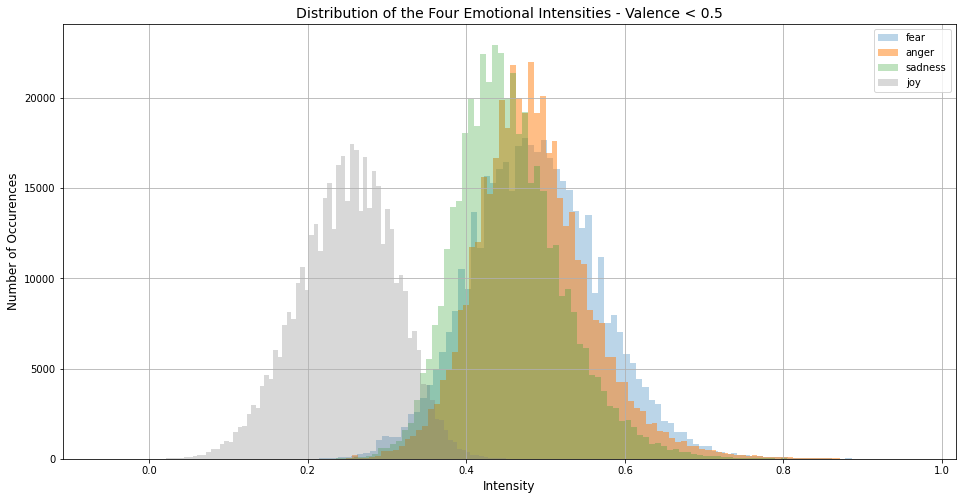

In [12]:
# Plot the number of occurences for each of the emotions.
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence < 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, label = "fear") # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, label = "anger") # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, label = "sadness") # green
negative_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey", label = "joy") # grey
plt.legend(loc = "upper right")
plt.show()

Between the four intensities, the emotions considered negative--fear, anger and sadness--have many more occurences than the only positive emotion, joy (outlined in grey). This suggests that there might be some correlation between the topic discussed (in this case, COVID) and the most prevelant emotions. Additionally, the three negative emotions have a greater distribution than the positive emotion, "joy," suggesting people tend to experience wider variation in intensity of negative emotions when confronted with the same topic.

When closely examining the three core negative emotions, their histograms overlap and are descending in height with each histogram being slightly wider than its neighbor (in the order of sadness, anger, and fear). Sadness has the most occurences and the most narrow distribution; this would suggest that when people experience sadness in the context of COVID, the intensities across all those individuals is roughly the same. Anger overlaps with sadness but is wider. Its peak does not have the same number of occurences, but a wider base. The collection of people who experience anger do not all feel it in the same way, but of varying intensities. Lastly, fear is the shortest but has the widest distribution. SImilar to anger, this would indicate that fear encompasses a range of experiences in intensity, and because of that, the height of its histogram is shorter than the rest.

The trend in height, width and overlapped behaviour of the core negative emotions points to an extremely loose correlation between the three; the fact that the majority of each histogram overlaps with the others would suggest that there is a specifc range of intensities which correspond to negative emotions.

#### All records with Positive Valence Intensity
**Analyzing the four emotions where the "overall mood" is positive**

In [19]:
pos_valence = data[data["valence_intensity"] >= 0.5]

In [20]:
pos_valence.head()

,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used
2400,1224707682013151234,3334888083,1,0,0,1,0,0,0,0,0,0,0.548,0.388,0.370,0.344,0.414,positive,joy,wuhan
3131,1224697244378705925,2330878992,1,0,1,0,0,0,0,0,0,0,0.537,0.378,0.379,0.364,0.350,positive,joy,wuhan
2321,1224708876530061313,494732159,1,1,0,0,0,0,0,0,0,0,0.521,0.448,0.423,0.444,0.424,positive,joy,wuhan
4410,1224678668510924802,1202543449850798080,1,0,0,0,0,0,0,0,0,0,0.580,0.370,0.414,0.374,0.420,positive,joy,wuhan
8579,1224609172961910784,33879571,1,0,0,0,0,0,0,0,0,0,0.538,0.305,0.300,0.358,0.438,positive,joy,wuhan


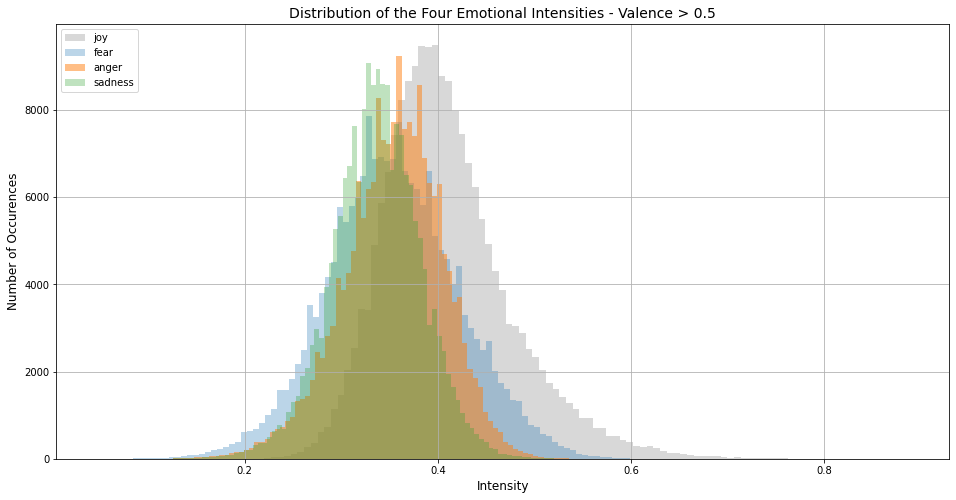

In [18]:
plt.figure(figsize = (16, 8))
plt.title("Distribution of the Four Emotional Intensities - Valence > 0.5", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
pos_valence["joy_intensity"].hist(bins = 100, alpha = 0.3, color = "grey", label = "joy") # grey
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, label = "fear") # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, label = "anger") # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, label = "sadness") # green
plt.legend(loc = "upper left")
plt.show()

Unlike the emotions categorized with negative valence intensity, an the four emotions are more clustered towards 0.35-0.4. There is still a pattern with the negative emotions; they overlap with each other and all vary in width. However, joy ilicited the greatest number of occurences, a wider distribution, and greater overall intensity (shifted to the right). This is to be expected since we are looking at a valence of >0.5. However, unlike the previous findings, anger matched (if not became greater in some cases) the number of occurences with sadness. It also looks to have approximately the same width, just shifted to the right. Between the two graphs, this trend might demonstrate a deeper link between anger and sadness (i.e., one affects the other or when an individual experiences one, they are most likely to experience the other).

**Comparison between Positive and Negative Valence Intensities (Using Means)**

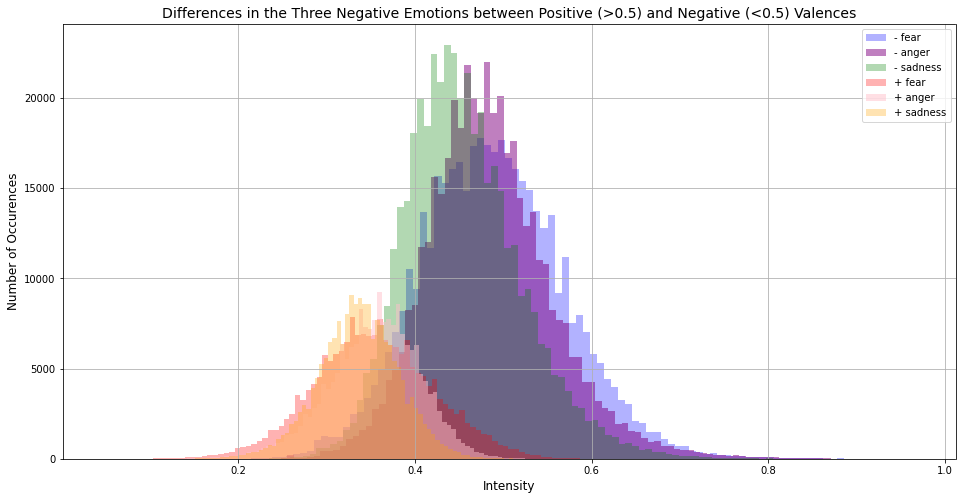

In [27]:
plt.figure(figsize = (16, 8))
plt.title("Differences in the Three Negative Emotions between Positive (>0.5) and Negative (<0.5) Valences", size = 14)
plt.xlabel("Intensity", size = 12)
plt.ylabel("Number of Occurences", size = 12)
negative_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "blue", label = "- fear") # blue
negative_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "purple", label = "- anger") # orange
negative_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "green", label = "- sadness") # green
pos_valence["fear_intensity"].hist(bins = 100, alpha = 0.3, color = "red", label = "+ fear" ) # blue
pos_valence["anger_intensity"].hist(bins = 100, alpha = 0.5, color = "pink", label = "+ anger" ) # orange
pos_valence["sadness_intensity"].hist(bins = 100, alpha = 0.3, color = "orange", label = "+ sadness") # green
plt.legend(loc = "upper right")
plt.show()

Negative Valence Intensity (i.e. Negative overall "mood") translates to a much greater intensity in all of the singular emotions. Likewise, Positive Valence Intensity (i.e. Positive "mood") does not seem to greatly affect the intensity of all the four emotions. Negative valence emotions occur +2 times more than their positive counterparts. 

<u>These three plots would indicate that the current topic of COVID illicits a response of "negative mood," with fear being the most encompassing, anger the most pointed and universal in how it's felt, and sadness the most generally felt.</u>

### The following section seeks to see trends of emotion across time

In [36]:
twitter_sentiment = pd.read_csv('randomized_sample.csv') # Here I'm re-importing the csv for formatting concerns 
                                                         # since everyone works with dataframes differently.  

In [37]:
rolling_mean_valence = twitter_sentiment.valence_intensity.rolling(window=10000).mean()
# This line of code just takes the rolling average of overall valence intensity through a window of 10,000 tweets. 
# The reasoning behind this is to try and consolidate longer term trends as opposed to the chaos of single tweets 
# and their respective emotions. It removes a lot of the noise at the expense of granularity. 

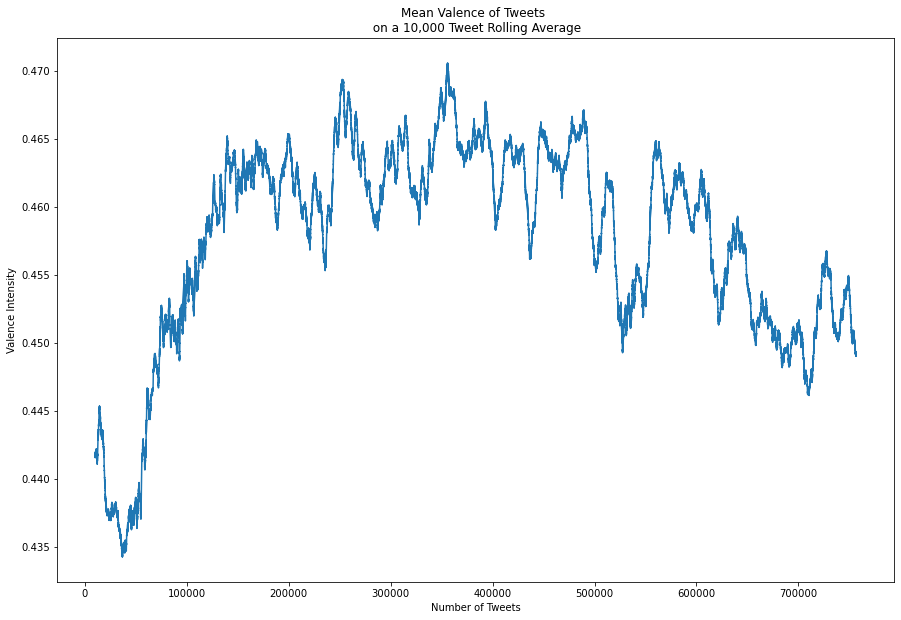

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

y = rolling_mean_valence

ax.plot(y,label='Valence')
ax.set(title='Mean Valence of Tweets \n on a 10,000 Tweet Rolling Average',ylabel='Valence Intensity',xlabel='Number of Tweets')


plt.show()
# This is a plot of the rolling average of valence emotion across a window of 10,000 tweets. 

#### Trend Analysis 
Although there is no clear and discernible trend of emotion across time, there are a couple things that stand out. People are feeling less negative intensity of emotion towards the end as compared to the start. There is a cycle between feeling a more positive emotion intensity followed by feeling a more negative emotion intensity. This results in the overall graph having certain "peaks" and "valleys" throughout the data. 
<br><br> We wanted to get more in depth to this segment of the study and see if there were trends across time (segmenting across monthly and weekly data) but we couldn't do it with the resources avaiable to us at the time. We could have pulled this information from the Twitter API and merged it with our randomized sample but sadly we haven't gotten approved for Twitter's development access. We still believe there is a lot of potential in this area and will continue this reasearch on our own time once API approval comes our way. 

### The following section seeks to understand the relationship between certain variables of our dataset

In [39]:
quantified_sentiment_category = []
for i in twitter_sentiment['sentiment_category']:
    if i == 'very negative':
        quantified_sentiment_category.append(-2)
    elif i == 'very positive':
        quantified_sentiment_category.append(2)
    elif i == 'negative':
        quantified_sentiment_category.append(-1)
    elif i == 'positive':
        quantified_sentiment_category.append(1)
    elif i == 'neutral':
        quantified_sentiment_category.append(0)
#This quantifies the column of sentiment category; it turns a categorical variable into a quantitative one 

In [40]:
quantified_sentiment_category = pd.DataFrame(quantified_sentiment_category)
quantified_sentiment_category.rename(columns={0:'sentiment_category_quantified'},inplace=True)
quantified_sentiment_category.head()

,sentiment_category_quantified
0,-1
1,-2
2,-1
3,-1
4,-1


In [41]:
twitter_sentiment = twitter_sentiment.merge(quantified_sentiment_category,how='left',left_index=True,
                                            right_index=True)
twitter_sentiment.head()
# This just merges our newly quantified sentiment category into the original dataset. 

,Unnamed: 0,tweet_ID,t1,t2,t3,t4,t5,t6,t7,t8,...,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category,keyword_used,user_ID,sentiment_category_quantified
0,8183,1224615942803664896,1,1,0,0,0,0,0,0,...,0.475,0.381,0.461,0.433,0.338,negative,fear,wuhan,223101960,-1
1,1538,1224720188752433154,1,0,1,0,0,0,0,0,...,0.294,0.538,0.581,0.535,0.163,very negative,fear,wuhan,17818643,-2
2,8497,1224610619384528896,1,0,0,0,0,0,0,0,...,0.427,0.530,0.621,0.516,0.251,negative,fear,wuhan,19383099,-1
3,2398,1224707720995069952,1,1,0,0,0,0,0,0,...,0.473,0.432,0.563,0.450,0.346,negative,fear,wuhan,43381817,-1
4,9313,1224596331315986433,1,0,0,1,0,0,0,0,...,0.431,0.444,0.471,0.414,0.326,negative,fear,wuhan,3002161959,-1


In [42]:
dummy_emotion = pd.get_dummies(twitter_sentiment['emotion_category'])
dummy_emotion.head()
# This allows us to run regressions on qualitative variables, so here we convert emotions into a binary value
# 1 if the emotion is present and 0 if it is not.  

,anger,fear,joy,no specific emotion,sadness
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [43]:
dummy_emotion = dummy_emotion.merge(twitter_sentiment['sentiment_category_quantified'],how='left',left_index=True,right_index=True)
dummy_emotion.columns = dummy_emotion.columns.str.replace(' ','_')
dummy_emotion.head()
# Since we wanted to see the relationship between specific emotions and their overall intensity, we merged both 
# aspects into one dataframe out of sheer simplicity.  

,anger,fear,joy,no_specific_emotion,sadness,sentiment_category_quantified
0,0,1,0,0,0,-1
1,0,1,0,0,0,-2
2,0,1,0,0,0,-1
3,0,1,0,0,0,-1
4,0,1,0,0,0,-1


In [44]:
reg_emotion = smf.ols('sentiment_category_quantified ~ fear+anger+joy+sadness',dummy_emotion).fit()
print(reg_emotion.summary())
# This runs said regression and prints out the result. 

                                  OLS Regression Results                                 
Dep. Variable:     sentiment_category_quantified   R-squared:                       0.947
Model:                                       OLS   Adj. R-squared:                  0.947
Method:                            Least Squares   F-statistic:                 3.353e+06
Date:                           Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                                   15:23:50   Log-Likelihood:                 97698.
No. Observations:                         756400   AIC:                        -1.954e+05
Df Residuals:                             756395   BIC:                        -1.953e+05
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

#### Statistical Jargon 

This model on the other, appears to have tremendous predictive power when it relates the quantified column of sentiment category to specific emotions. 
<br><br> If we're going to run through this taking all necessary statistical steps we first have to conduct a test of hypothesis where H0: β1=β2=β3=β4=0 (where βi is the slope of a given xi variable). If the null hypothesis is true, this means that no β has a relationship with our value of y. 
<br><br>Our alternative hypothesis is as follows, Ha: At least 1 βi≠0. If the alternative hypothesis is true, this means that at least one β has a relationship with y. 
<br><br> To confirm which hypothesis is correct we look to "Prob (F-statistic)" in our OLS Regression Results, since our p-value is smaller than any reasonable α (.05 or .01) we can reject the null hypothesis, concluding that there's statistically significant evidence in favor of at least one β having a relationship with y 
<br><br> We can now look at the model's predictive ability, which for multiple regression is defined by the Adjusted R-squared (since this metric takes into account the amount of independent variables the model is using) to conclude that approximately 94.7% of the variation in y can be explained away by variation in our independent variables. 
<br><br> We can further decompose our model by independent variable as follows: <br><p style="text-indent: 40px">β1: The average quantified value of sentiment category is -1.0473 when fear is present, holding all other variables constant</p>
<br><p style="text-indent: 40px">β2: The average quantified value of sentiment category is -1.0840 when anger is present, holding all other variables constant</p>
<br><p style="text-indent: 40px">β3: The average quantified value of sentiment category is 1.0265 when joy is present, holding all other variables constant</p>
<br><p style="text-indent: 40px">β4: The average quantified value of sentiment category is -1.1349 when sadness is present, holding all other variables constant</p>
<br>Unsurprisingly, joy contributes positive emotion. What's more interesting however, is to look at which negative emotion contributes the most to the quantified value of sentiment category, which our model suggests is sadness since the average value of that is closer to -2 (the most extreme value of negative emotion) than any other emotion. From there, it appears to be that anger contributes more towards negative emotion than fear since |β1|>|β2|
#### Actual Significance and Interpretation 
With my statistical fanfare out of the way, we can actually address what this all means. The main conclusion I can draw from this regression does not lie in it's predicitve power, since such a high value of R-squared is suspicious, but rather conclusions can be drawn from what each emotion contributes. It's interesting to see which emotions contribute the most towards a single direction, especially when you have three emotions that are all negative, as is the case with fear, anger, and sadness. The regression supports the view that sadness contributes the most negative emotion out of the three since it has a slope which is closest to -2 (the value associated with a sentiment category of very negative). As such, this regression has allowed us to decompose the contribution of each negative emotion and see which is the most powerful, which in this case, is sadness above all else. 

### The following section seeks to understand negative emotions more deeply

In [45]:
valence_category = twitter_sentiment.groupby('emotion_category').agg({'valence_intensity':'mean',
                                            'sentiment_category_quantified':'mean'}).reset_index().drop([2,3])
frequency = pd.DataFrame(twitter_sentiment['emotion_category'].value_counts()).reset_index().drop([2,3])
frequency
# This just groups emotions with their average valence intensity and average sentiment quantified.  
# This block also finds the frequency of each emotion. 

,index,emotion_category
0,anger,205483
1,fear,197249
4,sadness,39415


In [46]:
valence_category

,emotion_category,valence_intensity,sentiment_category_quantified
0,anger,0.394533,-1.084017
1,fear,0.402245,-1.047280
4,sadness,0.386021,-1.134898


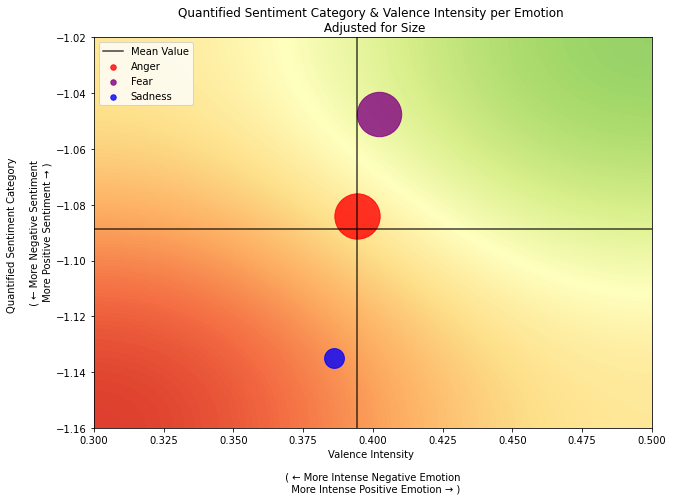

In [191]:
fig, ax = plt.subplots(figsize=(10,15))

x = valence_category['valence_intensity'].iloc[0]
y = valence_category['sentiment_category_quantified'].iloc[0]
x2 = valence_category['valence_intensity'].iloc[1]
y2= valence_category['sentiment_category_quantified'].iloc[1]
x3 = valence_category['valence_intensity'].iloc[2]
y3= valence_category['sentiment_category_quantified'].iloc[2]

ax.scatter(x,y,s=frequency['emotion_category'].iloc[0]/100,alpha=.8,label='Anger',color='r')
ax.scatter(x2,y2,s=frequency['emotion_category'].iloc[1]/100,alpha=.8,label='Fear',color='purple')
ax.scatter(x3,y3,s=frequency['emotion_category'].iloc[2]/100,alpha=.8,label='Sadness',color='blue')

ax.legend()
ax.set(title='Quantified Sentiment Category & Valence Intensity per Emotion \n Adjusted for Size'
       ,xlabel='Valence Intensity \n\n ( ← More Intense Negative Emotion \n  More Intense Positive Emotion → )'
       ,ylabel='Quantified Sentiment Category \n\n ( ← More Negative Sentiment \n More Positive Sentiment → )')
ax.axvline(x=valence_category['valence_intensity'].mean(),c='black',alpha=.75,label='Mean Value')
ax.axhline(y=valence_category['sentiment_category_quantified'].mean(),c='black',alpha=.75)

lgnd = plt.legend(loc="upper left", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]

# The code up to this point is just a regular scatter plot with valence intensity and quantified emotion where 
# the size of each point is scaled by the frequency of each emotion (if an emotion shows up more times then the
# bubble is larger and vice versa)

def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


gradient_image(ax, direction=.5,extent=(0.3,.5,-1.16,-1.02),
               cmap=cm.RdYlGn, cmap_range=(.1, .75))

# This code however, adds a diagonal gradiation between red, yellow, and green in order to help visualize what a
# position in the graph represents. Movement towards the upper right quadrant represent an overall positive 
# movement since quantified emotion category is getting closer to 2 (emotions which are very positive) and valence 
# intensity is getting closer to 1 (which is a very intense positive emotion). The opposite can be said for 
# movement towards the lower left quadrant. 

plt.show()

#### What this pretty graph means 
This is, in a way, a continuation and visualization of our regression findings since the conclusion is that sadness is the emotion that is felt with most intensity and is closer to the "very negative" side of the sentiment category spectrum. What we gain from this visualization that was lost in the regression is twofold: first, we add valence intensity into the mix (where the regression only takes into account quantified sentiment category) and second, we also add frequency into the visualization. 
<br><br> We can quitely clearly see that sadness is the emotion least represented out of the three negative emotions. What's yet to be resolved is the direction of that relationship. 
<br><p style="text-indent: 40px">Is sadness so intensely negative because so few people felt and as such is a consequence of a skewed distribution?</p>
<br><p style="text-indent: 40px">Or is sadness such an intense emotion that less people feel it overall because of its intensity?</p>
<br> Establishing this causal relationship is currently outside the scope of my ability but it does not fall outside of the scope of my interest. Therefore, this is another interesting avenue I will seek to explore in my own time after this project has concluded because it really seeks to address the driving question of this whole project, **"What do people feel most, at a fundamental level?"**
<br><br> The same question can be asked for the remaining two emotions, **"Why is fear less intense and less negative than anger?"**, to which I have no answer other than pointing at our statistical evidence, and **"Why is anger less intense and less negative than sadness?"**, to which I again have no resounding answer.
<br><br> So although this graph doesn't definitely resolve every question we still have, it does allow us to see the relationship between certain variables and points in the way of further research that must be done in order to address those questions.

## Conclusion

After evaluating the tweets by both their emotional weights (the various intensities) and sentiment categories, we can conclude the following:

1. "Sadness" has the most gravitational pull: the negative emotions revolve around "Sadness," both in the number of occurences and when running our regression model. Even though "Anger" has the greatest distribution of intensities and centers around the mean of Valence Intensity and Quantified Sentiment Category, it is the most "neutral" in its impact on the other emotions.
2. "Joy" is not demonstratively impacted by the other negative emotions. However, it is impacted by Valence Intensity.
3. "Fear," although usually associated as a negative emotion, is the most neutral.

Although our initial findings are rudimentary, it is only a snapshot of these tweets. What will be more substantive is how our discoveries change over time and or we explore more of the contents of the tweets themelves (see Appendix for example).

## Appendix

### The moment we were outside our depth 

In [44]:
from kmodes.kmodes import KModes

In [48]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(topics)

print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3732, cost: 427437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 125641, cost: 518204.0
Run 2, iteration: 2/100, moves: 79412, cost: 518204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 183023, cost: 484159.0
Run 3, iteration: 2/100, moves: 25459, cost: 484159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 301884, cost: 803538.0
Run 4, iteration: 2/100, moves: 127417, cost: 803538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 130265, cost: 847085.0
Best run was number 1
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0]]


In [54]:
clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns = topics.columns
clusterCentroidsDf

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,1,1,0,0,0,0,0,0,0,0


#### What am I looking at? 
Well, I was kinda hoping you could tell me that because what you see above is the consequence of trying to implement a machine learning clustering algorithim using StackOverflow and not knowing what it's doing. Our goal with this clustering algorithim was to try and see if there were any natural relationships between certain topics which might leads us to interesting conclusions regarding content and the emotion it elicited. And the clustering worked in the sense that it ran without errors but we don't know what the output means. 

<br>To walk you through our rationale, we chose to use KModes instead of KMeans because we wanted to clusted categorical data instead of quantitative data (which is the consensus amongst the several forum posts we read) but we don't know how to work with the output. Like several parts of this project, it didn't exactly illuminate groundbreaking conclusions but it did make us aware of our "unknown unknowns" which are now just "known unknowns". It also made it clear where we have to re-direct our efforts were we to continue this analysis.

<br> We just thought it would be interesting to include this in the Appendix because although it didn't give us anything actionable, in terms of project-related conclusions, it did allow us to learn more about data science and what it actually means to analyze data in such a broad, and complicated way like we did. 